# HR Analaytics Gurgen Hovakimyan 

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data.

In [2]:
main_data = pd.read_csv("HR_employee_data.csv")

### Introduction to Data.

In [3]:
main_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
main_data.shape

(1470, 35)

We have 35 columns and 1470 rows. 

Please find bellow description of categorical columns:

* Education: 1)'Below College' 2)'College' 3)'Bachelor' 4)'Master' 5)'Doctor'
* EnvironmentSatisfaction 1)'Low' 2)'Medium' 3)'High' 4)'Very High'
* JobInvolvement 1)'Low' 2)'Medium' 3)'High' 4)'Very High'
* JobSatisfaction 1)'Low' 2)'Medium' 3)'High' 4)'Very High'
* PerformanceRating 1)'Low' 2)'Good' 3)'Excellent' 4)'Outstanding'
* RelationshipSatisfaction 1)'Low' 2)'Medium' 3)'High' 4)'Very High'
* WorkLifeBalance 1)'Bad' 2)'Good' 3)'Better' 4)'Best'

### Checking if there is any missing data

In [5]:
main_data.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

### Checking data types.

In [6]:
main_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
main_data[main_data.select_dtypes(['object']).columns] =\
main_data.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [8]:
main_data[['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'JobLevel',\
          'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'EmployeeNumber', 'StockOptionLevel']] =\
main_data[['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'JobLevel',\
          'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'EmployeeNumber',\
           'StockOptionLevel']].astype('category')

In [9]:
main_data.dtypes

Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                   category
EducationField              category
EmployeeCount                  int64
EmployeeNumber              category
EnvironmentSatisfaction     category
Gender                      category
HourlyRate                     int64
JobInvolvement              category
JobLevel                    category
JobRole                     category
JobSatisfaction             category
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                      category
OverTime                    category
PercentSalaryHike              int64
PerformanceRating           category
RelationshipSatisfaction    category
StandardHours                  int64
S

### Summary statistics

In [10]:
main_data.describe()

,Age,DailyRate,DistanceFromHome,EmployeeCount,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1.0,65.891156,6502.931293,14313.103401,2.693197,15.209524,80.0,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,0.0,20.329428,4707.956783,7117.786044,2.498009,3.659938,0.0,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.0,30.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,1.0,48.000000,2911.000000,8047.000000,1.000000,12.000000,80.0,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1.0,66.000000,4919.000000,14235.500000,2.000000,14.000000,80.0,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1.0,83.750000,8379.000000,20461.500000,4.000000,18.000000,80.0,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,100.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


From the description we can conclude 
* average age is 36 and median is 36 too, maybe Age column have normal distribution, we will check it.
* Employee Count iis useless column.
* Hourly Rate is very interesting variable and we maybe we will use it in visualization
* We have big spread of monthly income. Minimum is 1009 and maximum 19999.
* StandardHours is useless column too, because we have only one value-80

In [11]:
main_data = main_data.drop(['EmployeeCount', 'StandardHours'], axis = 1)

It's interesting to see relationship between age and satisfaction level.

In [12]:
set(main_data.Department)

{'Human Resources', 'Research & Development', 'Sales'}

In [13]:
main_data.groupby(['Department', 'Education'])[['MonthlyIncome', 'YearsAtCompany']].describe()

MonthlyIncome                            \
                                         count         mean          std   
Department             Education                                           
Human Resources        1                   5.0  2776.600000   830.313073   
                       2                  13.0  4782.923077  4160.996605   
                       3                  27.0  6760.555556  5567.782471   
                       4                  15.0  9711.133333  7489.150094   
                       5                   3.0  4990.333333  1781.528651   
Research & Development 1                 115.0  5770.860870  4772.534140   
                       2                 182.0  6190.093407  4980.628413   
                       3                 379.0  6220.704485  4990.514292   
                       4                 255.0  6425.972549  4660.269678   
                       5                  30.0  8325.600000  5348.802261   
Sales                  1                  50.0  5627.300000  3928.955557   
                       2                  87.0  6518.839080  3444.421374   
                       3                 166.0  7154.777108  4213.130346   
                       4                 128.0  7304.734375  4080.002707   
                       5                  15.0  8839.200000  4860.942886   

                                                                              \
                                     min      25%     50%       75%      max   
Department             Education                                               
Human Resources        1          1555.0  2696.00  2804.0   2942.00   3886.0   
                       2          2109.0  2277.00  3423.0   4936.00  16437.0   
                       3          2064.0  2467.00  4490.0   8872.00  19189.0   
                       4          2073.0  2866.50  6077.0  18992.50  19717.0   
                       5          2956.0  4349.50  5743.0   6007.50   6272.0   
Research & Development 1          1009.0  2688.50  3691.0   7113.00  19973.0   
                       2          1051.0  2819.25  4393.0   6537.75  19613.0   
                       3          1102.0  2586.00  4197.0   7957.00  19926.0   
                       4          1393.0  2934.00  4869.0   7118.50  19999.0   
                       5          2127.0  4350.00  5724.0  13249.50  18300.0   
Sales                  1          1052.0  2752.75  4494.5   7772.50  19845.0   
                       2          1569.0  4653.50  6029.0   7007.00  18789.0   
                       3          1081.0  4296.00  5904.5   9403.00  19847.0   
                       4          1359.0  4722.75  5705.5   9257.00  19833.0   
                       5          4051.0  5417.00  7295.0   9136.50  19586.0   

                                 YearsAtCompany                           \
                                          count      mean       std  min   
Department             Education                                           
Human Resources        1                    5.0  4.600000  4.159327  1.0   
                       2                   13.0  6.769231  6.508377  1.0   
                       3                   27.0  8.481481  8.595036  1.0   
                       4                   15.0  6.733333  4.667007  2.0   
                       5                    3.0  5.000000  4.582576  1.0   
Research & Development 1                  115.0  6.730435  5.900226  0.0   
                       2                  182.0  6.565934  5.578525  0.0   
                       3                  379.0  6.662269  5.799282  0.0   
                       4                  255.0  7.239216  6.269664  0.0   
                       5                   30.0  8.566667  9.065597  0.0   
Sales                  1                   50.0  6.120000  6.514160  0.0   
                       2                   87.0  6.689655  4.935185  0.0   
                       3                  166.0  7.048193  5.823471  0.0   
       

It's strange but in HR department those who have PhD degree in average earn less than those who have Master Degree. Also they earn less compared to other education level and department except HR 1st and 2nd level of education. By the way we can see that they work for a long time.

In [14]:
main_data.groupby(['JobSatisfaction', 'Department'])[['Age']].describe()

Age                              \
                                        count       mean        std   min   
JobSatisfaction Department                                                  
1               Human Resources          11.0  36.454545   6.218740  29.0   
                Research & Development  192.0  36.906250   9.296825  19.0   
                Sales                    86.0  37.000000   9.530138  19.0   
2               Human Resources          20.0  39.550000   9.912645  25.0   
                Research & Development  174.0  36.913793   8.972568  19.0   
                Sales                    86.0  36.534884   8.904325  18.0   
3               Human Resources          15.0  37.466667   9.356943  24.0   
                Research & Development  300.0  37.510000   9.238021  18.0   
                Sales                   127.0  35.818898   8.970337  18.0   
4               Human Resources          17.0  36.941176  10.316677  19.0   
                Research & Development  295.0  36.732203   9.189954  18.0   
                Sales                   147.0  36.904762   8.915381  18.0   

                                                                  
                                          25%   50%    75%   max  
JobSatisfaction Department                                        
1               Human Resources         31.00  36.0  42.00  46.0  
                Research & Development  29.00  36.0  42.25  60.0  
                Sales                   30.00  35.0  43.50  60.0  
2               Human Resources         32.50  38.0  47.00  56.0  
                Research & Development  31.00  35.5  43.00  58.0  
                Sales                   30.00  37.0  41.75  58.0  
3               Human Resources         31.50  38.0  43.00  59.0  
                Research & Development  30.75  37.0  43.00  58.0  
                Sales                   30.00  34.0  41.50  59.0  
4               Human Resources         30.00  36.0  43.00  59.0  
                Research & Development  30.00  35.0  43.00  60.0  
                Sales                   31.00  35.0  43.00  60.0

Accodring to this result there is no difference between Job Satisfaction level depending on Age.

In [15]:
main_data.groupby(['Department', 'JobSatisfaction', 'Education'])[['MonthlyIncome']].describe()

MonthlyIncome                \
                                                         count          mean   
Department             JobSatisfaction Education                               
Human Resources        1               2                   2.0   6952.500000   
                                       3                   6.0   7637.333333   
                                       4                   1.0   2073.000000   
                                       5                   2.0   4614.000000   
                       2               1                   1.0   2804.000000   
                                       2                   5.0   3125.200000   
                                       3                   9.0   6591.111111   
                                       4                   5.0  11049.200000   
                       3               1                   3.0   2397.666667   
                                       2                   1.0   2267.000000   
                                       3                   5.0   7490.600000   
                                       4                   6.0   6921.000000   
                       4               1                   1.0   3886.000000   
                                       2                   5.0   6076.000000   
                                       3                   7.0   5705.428571   
                                       4                   3.0  15607.333333   
                                       5                   1.0   5743.000000   
Research & Development 1               1                  22.0   5146.545455   
                                       2                  39.0   6118.666667   
                                       3                  78.0   6777.628205   
                                       4                  47.0   6284.531915   
                                       5                   6.0   7989.166667   
                       2               1                  15.0   7393.800000   
                                       2                  30.0   5677.266667   
                                       3                  83.0   5544.626506   
                                       4                  43.0   6946.581395   
                                       5                   3.0   8804.666667   
                       3               1                  37.0   6977.432432   
                                       2                  55.0   6083.545455   
                                       3                 110.0   6414.990909   
                                       4                  86.0   6234.313953   
                                       5                  12.0   8069.250000   
                       4               1                  41.0   4423.243902   
                                       2                  58.0   6604.413793   
                                       3                 108.0   6140.175926   
                                       4                  79.0   6435.392405   
                                       5                   9.0   8732.000000   
Sales                  1               1                  10.0   3979.000000   
                                       2                  11.0   6109.363636   
                                       3                  34.0   7325.029412   
                                       4                  26.0   7798.961538   
                                       5                   5.0   8526.400000   
                       2               1                  10.0   4138.100000   
                                       2                  19.0   6139.105263   
                                       3                  36.0   7851.166667   
                                       4                  19.0   8595.473684   
                                       5                   2.0  12065.000000   
                       3               1         

This summary dashboard is logical more explanation I will give during exam.

### Visualization

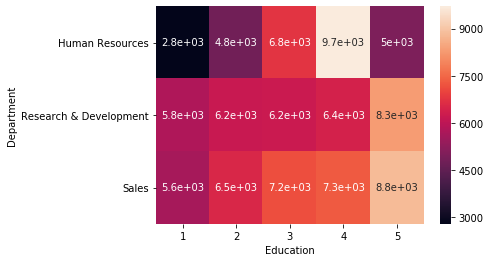

In [16]:
pivot_table = pd.pivot_table(main_data, values='MonthlyIncome', index=['Department'], columns=['Education'],\
                             aggfunc=np.mean)
ax = sns.heatmap(pivot_table, annot=True)

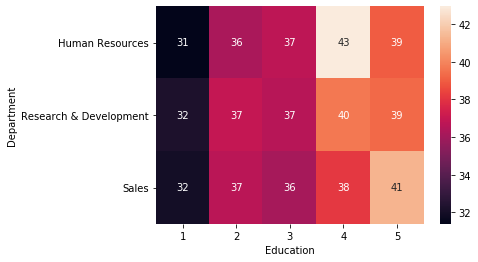

In [82]:
pivot_table = pd.pivot_table(main_data, values='Age', index=['Department'], columns=['Education'],\
                             aggfunc=np.mean)
ax = sns.heatmap(pivot_table, annot=True)

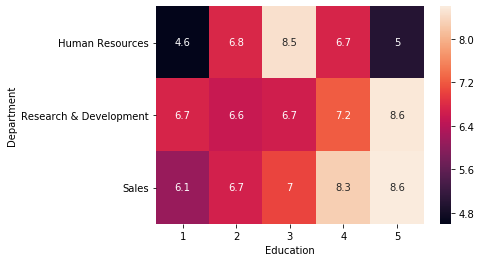

In [83]:
pivot_table = pd.pivot_table(main_data, values='YearsAtCompany', index=['Department'], columns=['Education'],\
                             aggfunc=np.mean)
ax = sns.heatmap(pivot_table, annot=True)

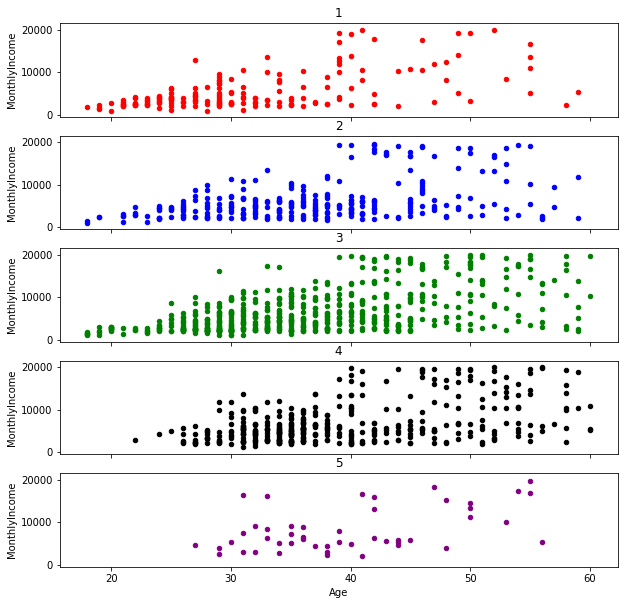

In [70]:
%matplotlib inline

color = ['red', 'blue', 'green', 'black', 'purple']
fig, axes = plt.subplots(5, figsize=(10, 10), sharex=True, sharey=True)
for (Education, group), ax, i in zip(main_data.groupby('Education'), axes.flatten(), range(5)):
    group.plot( x = 'Age', y= 'MonthlyIncome', kind = 'scatter', ax = ax, title = Education, color = color[i])
plt.show()

It seems that based on age there is no difference between Education level and income based on Age. 

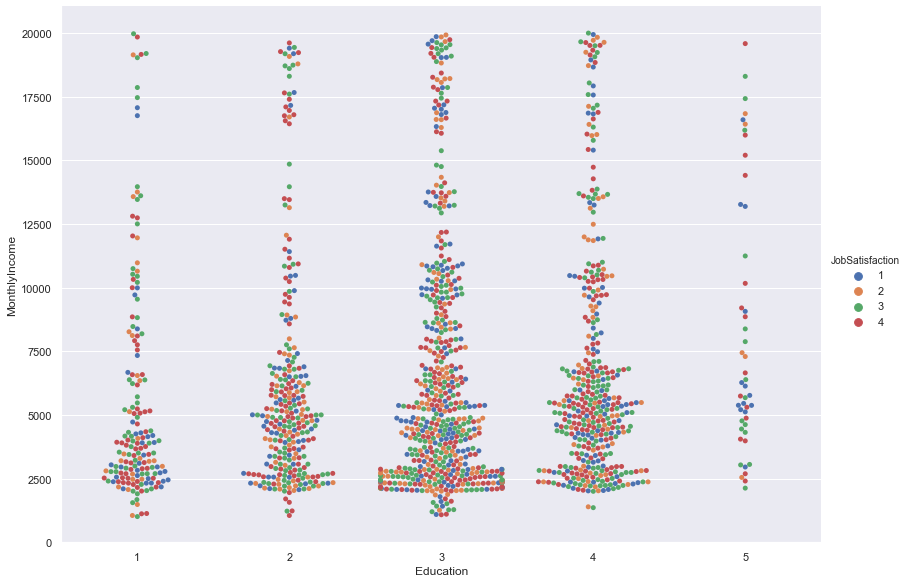

In [89]:
sns.catplot(x = 'Education', y = 'MonthlyIncome', hue = 'JobSatisfaction',\
            kind = 'swarm', data = main_data, height = 8.27, aspect = 11.7 / 8.27);

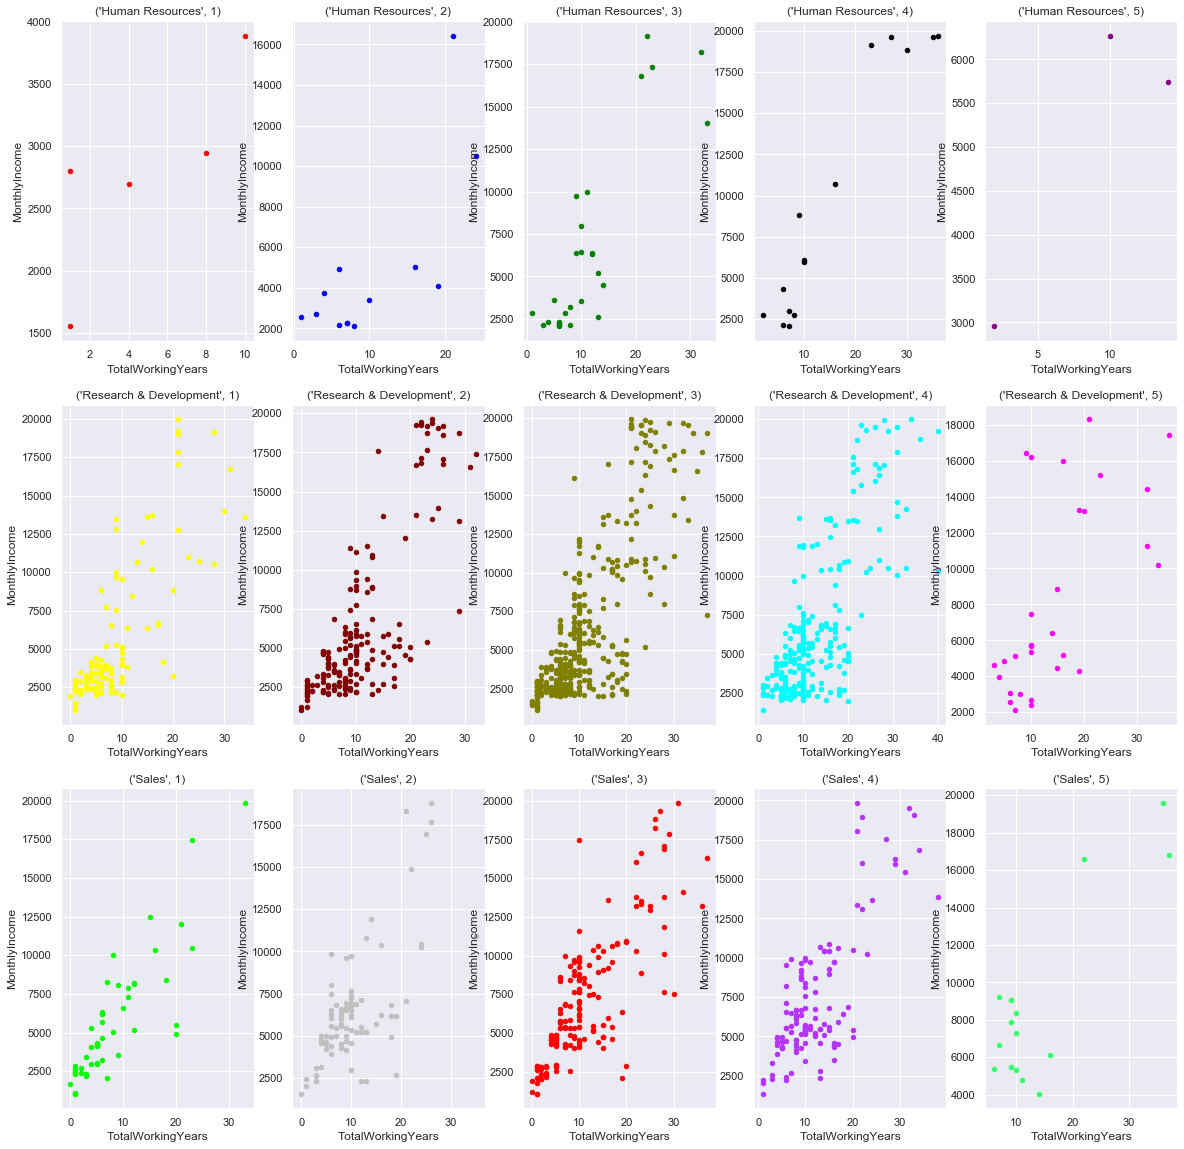

In [141]:
%matplotlib inline

names = list(set(main_data.groupby(['Department', 'Education']).groups))
color = ['red', 'blue', 'green', 'black', 'purple', 'yellow', 'maroon', 'olive', 'aqua', 'fuchsia', 'lime', 'silver', 'red', '#B633FF',\
         '#33FF6D', '#FFA833']
fig, axes = plt.subplots(3, 5, figsize=(20, 20))
for (title_name, group), ax, i in zip(main_data.groupby(['Department', 'Education']), axes.flatten(), range(15)):
    group.plot( x = 'TotalWorkingYears', y= 'MonthlyIncome', kind = 'scatter',\
               ax = ax, c = color[i], title = str(title_name));

Everywhere pattern is the same, they raise sallary according to working years and Education level doesn't metter.